In [1]:
import sys, os
import argparse

import numpy as np
import pandas as pd
import uproot
import csv, yaml

import h5py
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
def nerror(eff,N):
    y = np.sqrt(((100-eff)*eff)/N)
    return y

In [3]:
infos = []
sis = []

preds = []
labels = []
dVertexs = []
dTs = []
vertexXs = []
vertexYs = []
vertexZs = []

result_output = 'eval_1563_model_r01592_R14_Z10_nolog_for_blessing'
if not os.path.exists('result/'+result_output): os.makedirs('result/'+result_output)
runs = [1563]
lists = [14]
for j in runs:
    for i in lists:
        result_input = 'eval_'+str(j)+'_model_r01592_R'+str(i)+'_Z10_nolog'
        si_path = 'result/' + result_input + '/sampleInfo_eval.csv'
        fPred = 'result/' + result_input + '/' + result_input + '.csv'
        si = pd.read_csv(si_path)
        info = pd.read_csv(fPred)

        info_numpy = np.array(info)
        si_numpy = np.array(si)


        for i in range(len(info_numpy)):

            label = info_numpy[i][0]
            pred = info_numpy[i][1]

            fileidx = info_numpy[i][4]

            filename = si_numpy[int(fileidx)][2]


            idx = info_numpy[i][5]


            data = h5py.File(filename,'r')

            dT = data['events']['dT'][idx]
            dVertex = data['events']['dVertex'][idx]
            vertexX = data['events']['vertexX'][idx]
            vertexY = data['events']['vertexY'][idx]
            vertexZ = data['events']['vertexZ'][idx]


            preds.append(pred)
            labels.append(label)
            dVertexs.append(dVertex)
            dTs.append(dT)
        #     print(dTs.type)
            vertexXs.append(vertexX)
            vertexYs.append(vertexY)
            vertexZs.append(vertexZ)

In [4]:




preds = np.array(preds)
labels = np.array(labels)
dVertexs = np.array(dVertexs)
dTs = np.array(dTs)
vertexXs = np.array(vertexXs)
vertexYs = np.array(vertexYs)
vertexZs = np.array(vertexZs)


ME_label = []
ME_dVertex = []
ME_dT = []
ME_vertexX = []
ME_vertexY = []
ME_vertexZ = []
ME_pred = []


FN_label = []
FN_dVertex = []
FN_dT = []
FN_vertexX = []
FN_vertexY = []
FN_vertexZ = []
FN_pred = []

for i in range(len(preds)):
    if labels[i] == 1:
        ME_label.append(labels[i])
        ME_dVertex.append(dVertexs[i])
        ME_dT.append(dTs[i])
        ME_vertexX.append(vertexXs[i])
        ME_vertexY.append(vertexYs[i])
        ME_vertexZ.append(vertexZs[i])
        ME_pred.append(preds[i])
    else:
   
        FN_label.append(labels[i])
        FN_dVertex.append(dVertexs[i])
        FN_dT.append(dTs[i])
        FN_vertexX.append(vertexXs[i])
        FN_vertexY.append(vertexYs[i])
        FN_vertexZ.append(vertexZs[i])
        FN_pred.append(preds[i])
        
ME_sig = -np.log((1/np.array(ME_pred))-1)
FN_sig = -np.log((1/np.array(FN_pred))-1)
FN_over_0 = 100*np.sum(FN_sig > 0)/len(FN_sig)
ME_under_0 = 100*np.sum(ME_sig < 0)/len(ME_sig)


##################plot CNN score distribution figure
plt.hist(FN_sig, bins = 100, range = (-20, 20), density = True, color ='r',histtype = 'step')
plt.hist(ME_sig, bins = 100, range = (-20, 20), density = True, color ='b',histtype = 'step')
# plt.text(10, 0.15,'FN > 0' + str(FN_over_0), fontsize = 20)
# plt.text(10, 0.1, 'ME < 0' + str(ME_under_0), fontsize = 20)


FN_over = '%.2f' %FN_over_0
ME_under = '%.2f' %ME_under_0

label = ['FN : FN > 0 = '+FN_over+'%', 
         'ME : ME < 0 = '+ME_under+'%']


leg = plt.legend(label, loc = 'best', frameon=False)

leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=15)
plt.setp(leg_texts, fontsize=15)

plt.title('')
plt.savefig('result/' + result_output + '/' + result_output + '_CNN score distribution.png', dpi=300)
plt.clf()



num_FN = len(FN_dT)
num_ME = len(ME_dT)
###########plot dT
plt.hist(np.array(FN_dT)*0.001, bins = 100, color= 'r', alpha = 0.5, density = True, histtype = 'step')
plt.hist(np.array(ME_dT)*0.001, bins = 100, color= 'b', alpha = 0.5, density = True, histtype = 'step')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("\u03BCs", fontsize=15, loc='right')
plt.savefig('result/' + result_output + '/' + result_output + '_dT.png', dpi=300)
plt.clf()

###########plot dVertex
plt.hist(np.array(FN_dVertex)*100, bins = 80, color= 'r', alpha = 0.5, density = True, histtype = 'step')
plt.hist(np.array(ME_dVertex)*100, bins = 80, color= 'b', alpha = 0.5, density = True, histtype = 'step')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("cm", fontsize=15, loc='right')
plt.savefig('result/' + result_output + '/' + result_output + '_dVertex.png', dpi=300)
plt.clf()


##############plot vertexZ
plt.hist(np.array(FN_vertexZ)*100, bins = 80, color= 'r', alpha = 0.5, density = True, histtype = 'step')
plt.hist(np.array(ME_vertexZ)*100, bins = 80, color= 'b', alpha = 0.5, density = True, histtype = 'step')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("cm", fontsize=15, loc='right')
plt.savefig('result/' + result_output + '/' + result_output + '_vertexZ.png', dpi=300)
plt.clf()


##############plot R2
plt.hist((np.array(FN_vertexX)**2+np.array(FN_vertexY)**2)*100, bins = 80, color= 'r', alpha = 0.5, density = True, histtype = 'step')
plt.hist((np.array(ME_vertexX)**2+np.array(ME_vertexY)**2)*100, bins = 80, color= 'b', alpha = 0.5, density = True, histtype = 'step')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("cm", fontsize=15, loc='right')
plt.savefig('result/' + result_output + '/' + result_output + '_vertex_R2.png', dpi=300)
plt.clf()

####################################################################################

list_range = np.arange(0,1,0.001)


for i in range(len(list_range)):
    a = len(np.array(ME_pred)[np.array(ME_pred)>list_range[i]])/len(np.array(ME_pred))
#     print(list_range[i])
    
    if (a > 0.99):
     
        eff_99 = list_range[i]
        continue
        
    if (a > 0.95):
        
        eff_95 = list_range[i]
        continue
        
    if (a > 0.90):
       
        eff_90 = list_range[i]
        continue
##### eff 0.5 pred
eff_50_ME = len(np.array(ME_pred)[np.array(ME_pred)>0.5])/len(np.array(ME_pred))
eff_50_FN = len(np.array(FN_pred)[np.array(FN_pred)>0.5])/len(np.array(FN_pred))
num_50_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>0.5])/len(np.array(ME_pred))
num_50_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>0.5])/len(np.array(FN_pred))



##### eff 99% efficient
eff_99_ME = len(np.array(ME_pred)[np.array(ME_pred)>eff_99])/len(np.array(ME_pred))
eff_99_FN = len(np.array(FN_pred)[np.array(FN_pred)>eff_99])/len(np.array(FN_pred))
num_99_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>eff_99])/len(np.array(ME_pred))
num_99_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>eff_99])/len(np.array(FN_pred))




##### eff 95% efficient
eff_95_ME = len(np.array(ME_pred)[np.array(ME_pred)>eff_95])/len(np.array(ME_pred))
eff_95_FN = len(np.array(FN_pred)[np.array(FN_pred)>eff_95])/len(np.array(FN_pred))
num_95_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>eff_95])/len(np.array(ME_pred))
num_95_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>eff_95])/len(np.array(FN_pred))


##### eff 90% efficient
eff_90_ME = len(np.array(ME_pred)[np.array(ME_pred)>eff_90])/len(np.array(ME_pred))
eff_90_FN = len(np.array(FN_pred)[np.array(FN_pred)>eff_90])/len(np.array(FN_pred))
num_90_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>eff_90])/len(np.array(ME_pred))
num_90_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>eff_90])/len(np.array(FN_pred))


f = open('result/' + result_output + '/' + result_output + '_efficiency.txt','w')
print('         |   90%   |   95%   |   99%   |   mid   |',file=f)
print('--------------------------------------------------',file=f)
print('  ME_eff |','%.4f  |'%eff_90_ME,'%.4f  |'%eff_95_ME,'%.4f  |'%eff_99_ME,'%.4f  |'%eff_50_ME,file=f)
print('--------------------------------------------------',file=f)
print('  FN_eff |','%.4f  |'%eff_90_FN,'%.4f  |'%eff_95_FN,'%.4f  |'%eff_99_FN,'%.4f  |'%eff_50_FN,file=f)
print('--------------------------------------------------',file=f)
print('ME_remain|','%7d'%int(num_90_ME),'|','%7d'%int(num_95_ME),'|','%7d'%int(num_99_ME),'|','%7d'%int(num_50_ME),'|',file=f)
print('--------------------------------------------------',file=f)
print('FN_remain|','%7d'%int(num_90_FN),'|','%7d'%int(num_95_FN),'|','%7d'%int(num_99_FN),'|','%7d'%int(num_50_FN),'|',file=f)
print('--------------------------------------------------',file=f)
print('CNN score|','','%.3f'%eff_90,' | ','%.3f'%eff_95,' | ','%.3f'%eff_99,' |  ',0.5,'  |',file=f)
print('==================================================',file=f)
print('         |   FN    |   ME    |',file=f)
print('# data   |','%7d'%len(FN_dT),'|', '%7d'%len(ME_dT),'|',file=f)

f.close()



###############plot evaluation 

##### Draw ROC curve #####
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.cbook import get_sample_data

df = pd.read_csv(fPred)
tpr, fpr, thr = roc_curve(df['label'], df['prediction'], sample_weight=df['weight'], pos_label=0)
auc = roc_auc_score(df['label'], df['prediction'], sample_weight=df['weight'])


df_bkg = df[df.label==0]
df_sig = df[df.label==1]
plt.rcParams['figure.figsize'] = (10, 10)

plt.hist(df_bkg['prediction']*100, weights=df_bkg['weight'], histtype='step', 
         density=True, bins=50, color='red', linewidth=3)

plt.hist(df_sig['prediction']*100, weights=df_sig['weight'], histtype='step', 
         density=True, bins=50, color='blue', linewidth=3)



plt.xticks(np.arange(0, 101, step=20),["{}".format(x*0.01) for x in np.arange(0, 101,step=20)],fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("CNN score", fontsize=15, loc='right')
plt.ylabel("Normalized", fontsize=15, loc='top')
plt.xlim(0, 100)
label = ['Fast Neutron', 'Michel Electrons']

leg = plt.legend(label, loc = 'upper center', frameon=False)

leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=10)
plt.setp(leg_texts, fontsize=10)

plt.savefig('result/' + result_output + '/' + result_output + '_evaluation.png', dpi=300)
plt.clf()



###################### plot AUC


plt.rcParams['figure.figsize'] = (15, 15)



plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)



plt.plot(fpr*100, tpr*100, label='AUC = %.3f' % (auc))
plt.plot(eff_99_FN*100, eff_99_ME*100,'*r', markersize=40)

plt.plot(eff_95_FN*100, eff_95_ME*100,'*g', markersize=40)

plt.plot(eff_90_FN*100, eff_90_ME*100,'*b', markersize=40)

plt.plot(eff_50_FN*100, eff_50_ME*100,'*k', markersize=40)

plt.xlabel('FN efficiency (%)', fontsize=15, loc='right')
plt.ylabel('ME efficiency (%)', fontsize=15, loc='top')


plt.xlim(0, 100)
plt.ylim(0, 100)

plt.grid()
print_auc = '%.3f' %auc
print_eff_99 = '%.3f' %eff_99
print_eff_95 = '%.3f' %eff_95
print_eff_90 = '%.3f' %eff_90
label = ['AUC = '+print_auc,'99% WP(score='+print_eff_99+')', '95% WP(score='+print_eff_95+')', '90% WP(score='+print_eff_90+')','Middle WP (score=0.5)']

leg = plt.legend(label, loc = 'right', frameon=False)

 
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=10)
plt.setp(leg_texts, fontsize=10)

plt.savefig('result/' + result_output + '/' + result_output + '_AUC.png', dpi=300)
plt.clf()


f = open('result/' + result_output + '/' + result_output + '_information.txt','w')


print(eff_90_ME,eff_95_ME,eff_99_ME,eff_50_ME,file=f)

print(eff_90_FN,eff_95_FN,eff_99_FN,eff_50_FN,file=f)

print(int(num_90_ME),int(num_95_ME),int(num_99_ME),int(num_50_ME),file=f)

print(int(num_90_FN),int(num_95_FN),int(num_99_FN),int(num_50_FN),file=f)

print(eff_90,eff_95,eff_99,0.5,file=f)


print(len(FN_dT),len(ME_dT),file=f)
print(auc,file=f)

f.close()



/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log


<Figure size 432x288 with 0 Axes>

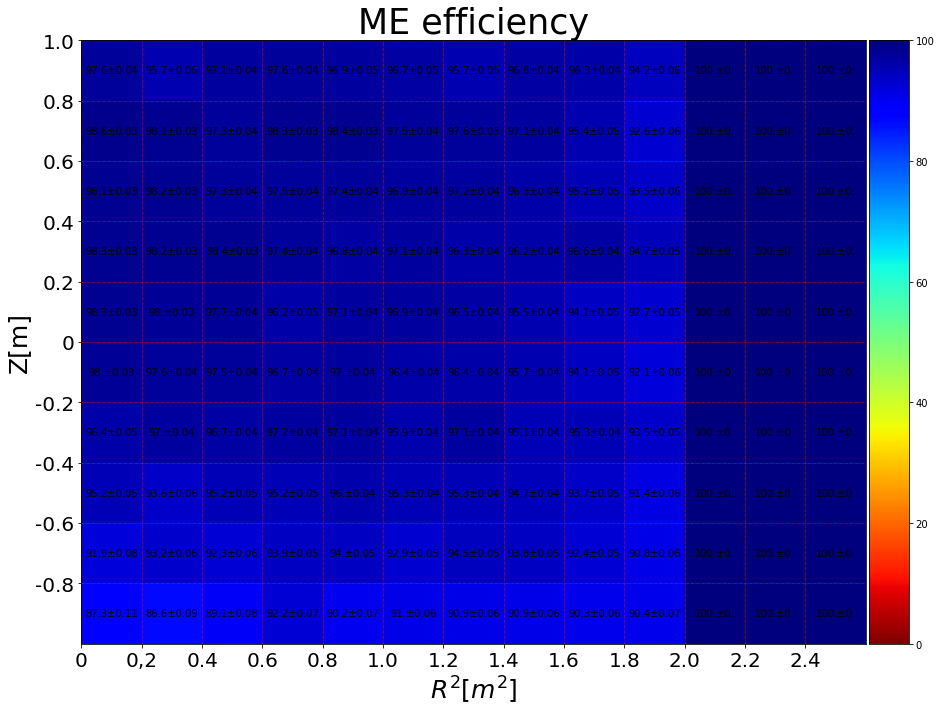

In [5]:


R2 = np.power(np.array(ME_vertexX),2)+np.power(np.array(ME_vertexY),2)
ME_eff = []
xx = []
yy = []
error = []

for j in range(-10,10,2):
    for i in range(0,26,2):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.2) & \
                    (j/10<= np.array(ME_vertexZ)) & \
                    (np.array(ME_vertexZ)<j/10+0.2)
        
        test = np.array(ME_pred)[isFiducial]
#         print(isFiducial)
#         print(test.sum())
#         print(test[test>0.5].sum()/test.sum())
        if len(test) == 0:
            ME_eff.append(0)
            error.append(0)
            xx.append(i)
            yy.append(j)
        else:
            ME_eff.append((len(test[test<0.5])/len(test)))
            error.append(nerror((len(test[test<0.5])/len(test)),len(test)))

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(100-np.trunc(np.array(ME_eff).reshape(-1,13)*1000)/10, cmap='jet_r',vmin=0,vmax=100)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')
# Show all ticks and label them with the respective list entries
# ax.set_xticklabels([0,0.1,0.5, 0.9, 1.1,1.5,1.9])
# ax.set_yticklabels(['',1.5,1.0,0.5,0,-0.5,-1.0,-1.5])


ax.set_xticks(np.arange(-.5, 12, 1))
ax.set_yticks(np.arange(-.5, 9, 1))
ax.set_xticklabels(['0','0,2','0.4','0.6','0.8','1.0','1.2','1.4','1.6','1.8','2.0','2.2','2.4'],fontsize=20)
ax.set_yticklabels(['1.0','0.8','0.6','0.4','0.2','0','-0.2','-0.4','-0.6','-0.8'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(10):
    for j in range(13):
        text = ax.text(j, i, np.array2string(100-(np.trunc(np.array(ME_eff).reshape(-1,13)*1000)/10)[i, j]) + '\u00B1' +np.array2string((np.trunc(np.array(error).reshape(-1,13)*100)/100)[i, j])
,
                       ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("ME efficiency",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



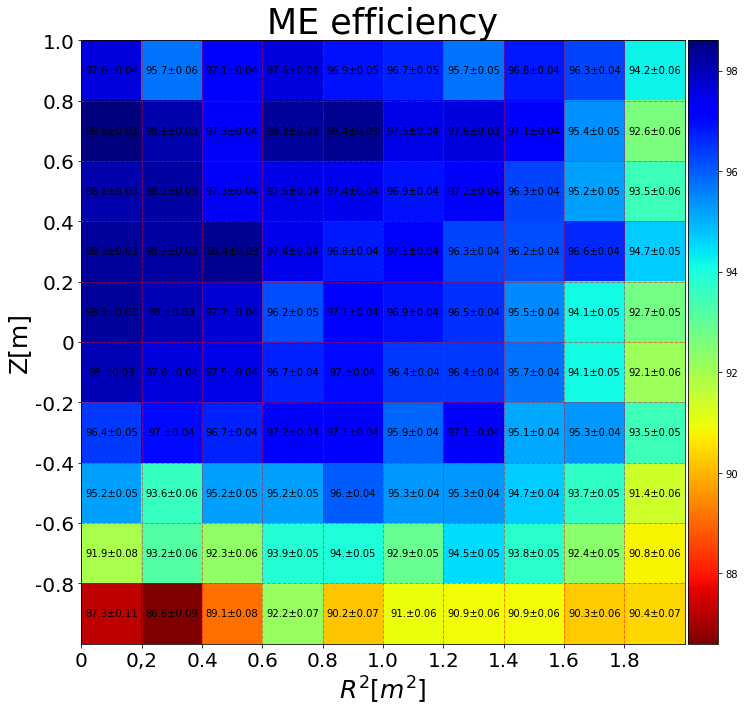

In [6]:


R2 = np.power(np.array(ME_vertexX),2)+np.power(np.array(ME_vertexY),2)
ME_eff = []
xx = []
yy = []
error = []

for j in range(-10,10,2):
    for i in range(0,20,2):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.2) & \
                    (j/10<= np.array(ME_vertexZ)) & \
                    (np.array(ME_vertexZ)<j/10+0.2)
        
        test = np.array(ME_pred)[isFiducial]
#         print(isFiducial)
#         print(test.sum())
#         print(test[test>0.5].sum()/test.sum())
        if len(test) == 0:
            ME_eff.append(0)
            error.append(0)
            xx.append(i)
            yy.append(j)
        else:
            ME_eff.append((len(test[test<0.5])/len(test)))
            error.append(nerror((len(test[test<0.5])/len(test)),len(test)))

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(100-np.trunc(np.array(ME_eff).reshape(-1,10)*1000)/10, cmap='jet_r')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')
# Show all ticks and label them with the respective list entries
# ax.set_xticklabels([0,0.1,0.5, 0.9, 1.1,1.5,1.9])
# ax.set_yticklabels(['',1.5,1.0,0.5,0,-0.5,-1.0,-1.5])


ax.set_xticks(np.arange(-.5, 9, 1))
ax.set_yticks(np.arange(-.5, 9, 1))
ax.set_xticklabels(['0','0,2','0.4','0.6','0.8','1.0','1.2','1.4','1.6','1.8'],fontsize=20)
ax.set_yticklabels(['1.0','0.8','0.6','0.4','0.2','0','-0.2','-0.4','-0.6','-0.8'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(10):
    for j in range(10):
        text = ax.text(j, i, np.array2string(100-(np.trunc(np.array(ME_eff).reshape(-1,10)*1000)/10)[i, j]) + '\u00B1' +np.array2string((np.trunc(np.array(error).reshape(-1,10)*100)/100)[i, j])
,
                       ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("ME efficiency",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



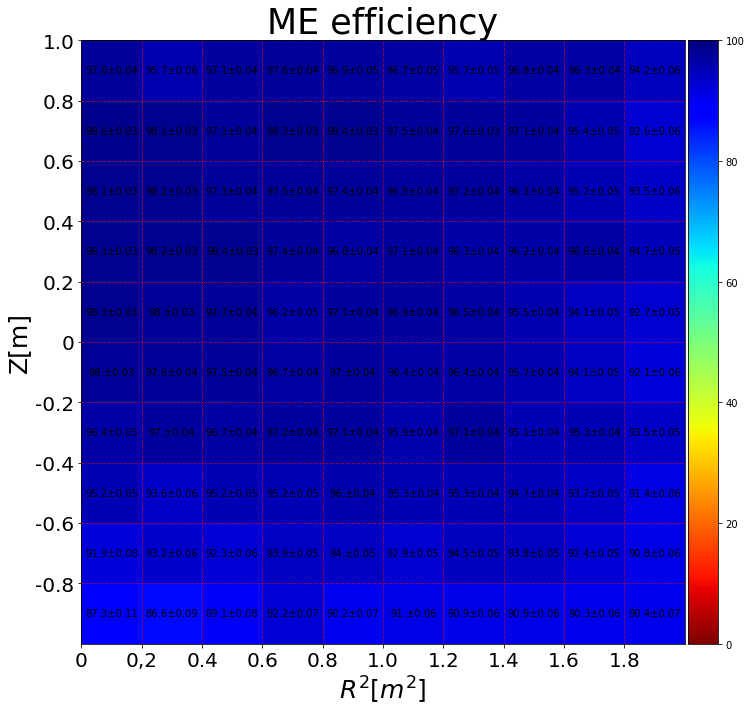

In [7]:


R2 = np.power(np.array(ME_vertexX),2)+np.power(np.array(ME_vertexY),2)
ME_eff = []
xx = []
yy = []
error = []

for j in range(-10,10,2):
    for i in range(0,20,2):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.2) & \
                    (j/10<= np.array(ME_vertexZ)) & \
                    (np.array(ME_vertexZ)<j/10+0.2)
        
        test = np.array(ME_pred)[isFiducial]
#         print(isFiducial)
#         print(test.sum())
#         print(test[test>0.5].sum()/test.sum())
        if len(test) == 0:
            ME_eff.append(0)
            error.append(0)
            xx.append(i)
            yy.append(j)
        else:
            ME_eff.append((len(test[test<0.5])/len(test)))
            error.append(nerror((len(test[test<0.5])/len(test)),len(test)))

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(100-np.trunc(np.array(ME_eff).reshape(-1,10)*1000)/10, cmap='jet_r',vmin=0,vmax=100)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')
# Show all ticks and label them with the respective list entries
# ax.set_xticklabels([0,0.1,0.5, 0.9, 1.1,1.5,1.9])
# ax.set_yticklabels(['',1.5,1.0,0.5,0,-0.5,-1.0,-1.5])


ax.set_xticks(np.arange(-.5, 9, 1))
ax.set_yticks(np.arange(-.5, 9, 1))
ax.set_xticklabels(['0','0,2','0.4','0.6','0.8','1.0','1.2','1.4','1.6','1.8'],fontsize=20)
ax.set_yticklabels(['1.0','0.8','0.6','0.4','0.2','0','-0.2','-0.4','-0.6','-0.8'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(10):
    for j in range(10):
        text = ax.text(j, i, np.array2string(100-(np.trunc(np.array(ME_eff).reshape(-1,10)*1000)/10)[i, j]) + '\u00B1' +np.array2string((np.trunc(np.array(error).reshape(-1,10)*100)/100)[i, j])
,
                       ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("ME efficiency",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



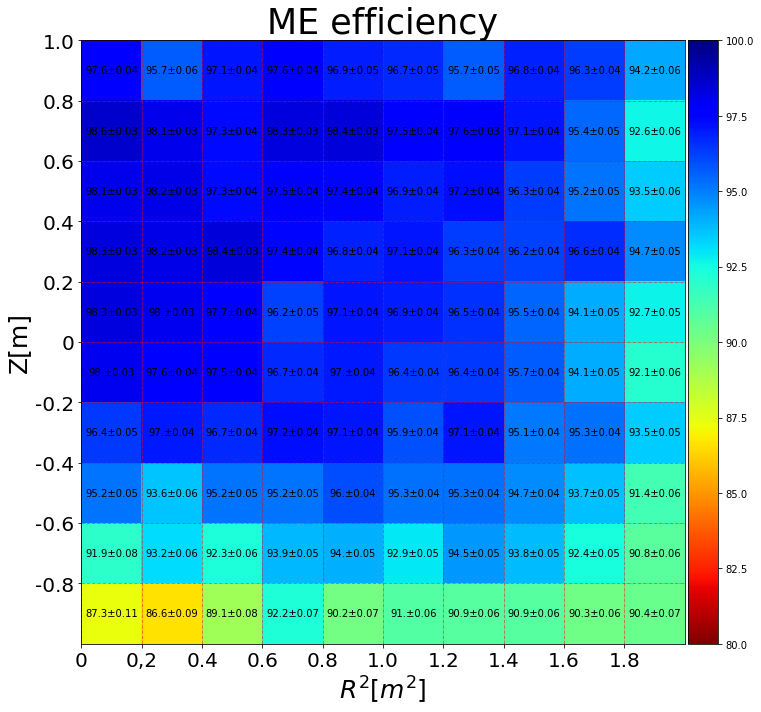

In [8]:


R2 = np.power(np.array(ME_vertexX),2)+np.power(np.array(ME_vertexY),2)
ME_eff = []
xx = []
yy = []
error = []

for j in range(-10,10,2):
    for i in range(0,20,2):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.2) & \
                    (j/10<= np.array(ME_vertexZ)) & \
                    (np.array(ME_vertexZ)<j/10+0.2)
        
        test = np.array(ME_pred)[isFiducial]
#         print(isFiducial)
#         print(test.sum())
#         print(test[test>0.5].sum()/test.sum())
        if len(test) == 0:
            ME_eff.append(0)
            error.append(0)
            xx.append(i)
            yy.append(j)
        else:
            ME_eff.append((len(test[test<0.5])/len(test)))
            error.append(nerror((len(test[test<0.5])/len(test)),len(test)))

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(100-np.trunc(np.array(ME_eff).reshape(-1,10)*1000)/10, cmap='jet_r',vmin=80,vmax=100)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')
# Show all ticks and label them with the respective list entries
# ax.set_xticklabels([0,0.1,0.5, 0.9, 1.1,1.5,1.9])
# ax.set_yticklabels(['',1.5,1.0,0.5,0,-0.5,-1.0,-1.5])


ax.set_xticks(np.arange(-.5, 9, 1))
ax.set_yticks(np.arange(-.5, 9, 1))
ax.set_xticklabels(['0','0,2','0.4','0.6','0.8','1.0','1.2','1.4','1.6','1.8'],fontsize=20)
ax.set_yticklabels(['1.0','0.8','0.6','0.4','0.2','0','-0.2','-0.4','-0.6','-0.8'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(10):
    for j in range(10):
        text = ax.text(j, i, np.array2string(100-(np.trunc(np.array(ME_eff).reshape(-1,10)*1000)/10)[i, j]) + '\u00B1' +np.array2string((np.trunc(np.array(error).reshape(-1,10)*100)/100)[i, j])
,
                       ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("ME efficiency",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



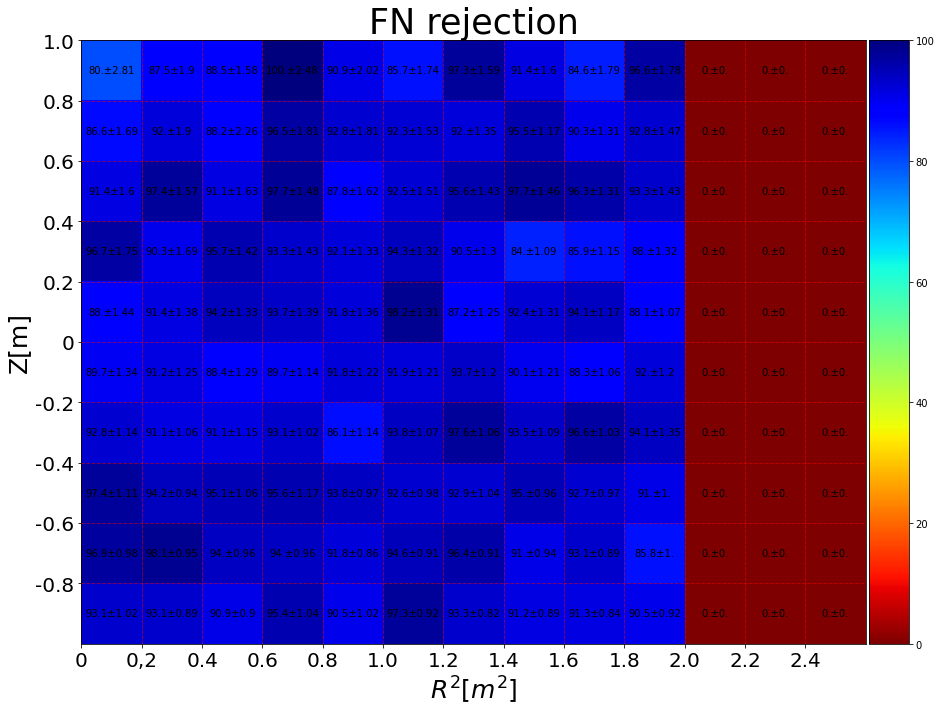

In [9]:


R2 = np.power(np.array(FN_vertexX),2)+np.power(np.array(FN_vertexY),2)
FN_eff = []
xx = []
yy = []
error = []

for j in range(-10,10,2):
    for i in range(0,26,2):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.2) & \
                    (j/10<= np.array(FN_vertexZ)) & \
                    (np.array(FN_vertexZ)<j/10+0.2)
        
        test = np.array(FN_pred)[isFiducial]
#         print(isFiducial)
#         print(test.sum())
#         print(test[test>0.5].sum()/test.sum())
        if len(test) == 0:
            FN_eff.append(0)
            error.append(0)
            xx.append(i)
            yy.append(j)
        else:
            FN_eff.append((len(test[test<0.5])/len(test)))
            error.append(nerror((len(test[test<0.5])/len(test)),len(test)))

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.trunc(np.array(FN_eff).reshape(-1,13)*1000)/10, cmap='jet_r',vmin=0,vmax=100)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')
# Show all ticks and label them with the respective list entries
# ax.set_xticklabels([0,0.1,0.5, 0.9, 1.1,1.5,1.9])
# ax.set_yticklabels(['',1.5,1.0,0.5,0,-0.5,-1.0,-1.5])


ax.set_xticks(np.arange(-.5, 12, 1))
ax.set_yticks(np.arange(-.5, 9, 1))
ax.set_xticklabels(['0','0,2','0.4','0.6','0.8','1.0','1.2','1.4','1.6','1.8','2.0','2.2','2.4'],fontsize=20)
ax.set_yticklabels(['1.0','0.8','0.6','0.4','0.2','0','-0.2','-0.4','-0.6','-0.8'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(10):
    for j in range(13):
        text = ax.text(j, i, np.array2string((np.trunc(np.array(FN_eff).reshape(-1,13)*1000)/10)[i, j]) + '\u00B1' +np.array2string((np.trunc(np.array(error).reshape(-1,13)*100)/100)[i, j])
,
                       ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("FN rejection",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



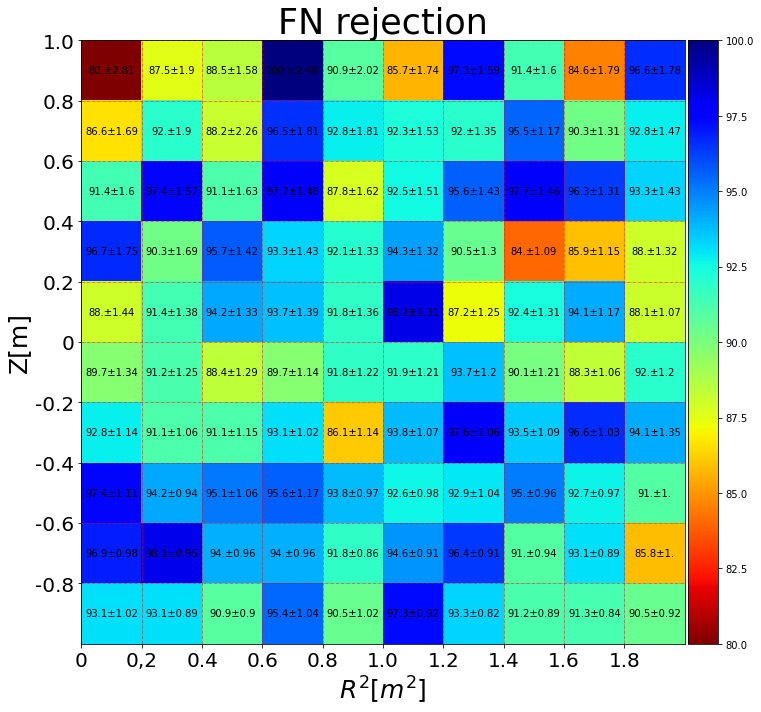

In [10]:


R2 = np.power(np.array(FN_vertexX),2)+np.power(np.array(FN_vertexY),2)
FN_eff = []
xx = []
yy = []
error = []

for j in range(-10,10,2):
    for i in range(0,20,2):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.2) & \
                    (j/10<= np.array(FN_vertexZ)) & \
                    (np.array(FN_vertexZ)<j/10+0.2)
        
        test = np.array(FN_pred)[isFiducial]
#         print(isFiducial)
#         print(test.sum())
#         print(test[test>0.5].sum()/test.sum())
        if len(test) == 0:
            FN_eff.append(0)
            error.append(0)
            xx.append(i)
            yy.append(j)
        else:
            FN_eff.append((len(test[test<0.5])/len(test)))
            error.append(nerror((len(test[test<0.5])/len(test)),len(test)))

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.trunc(np.array(FN_eff).reshape(-1,10)*1000)/10, cmap='jet_r')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')
# Show all ticks and label them with the respective list entries
# ax.set_xticklabels([0,0.1,0.5, 0.9, 1.1,1.5,1.9])
# ax.set_yticklabels(['',1.5,1.0,0.5,0,-0.5,-1.0,-1.5])


ax.set_xticks(np.arange(-.5, 9, 1))
ax.set_yticks(np.arange(-.5, 9, 1))
ax.set_xticklabels(['0','0,2','0.4','0.6','0.8','1.0','1.2','1.4','1.6','1.8'],fontsize=20)
ax.set_yticklabels(['1.0','0.8','0.6','0.4','0.2','0','-0.2','-0.4','-0.6','-0.8'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(10):
    for j in range(10):
        text = ax.text(j, i, np.array2string((np.trunc(np.array(FN_eff).reshape(-1,10)*1000)/10)[i, j]) + '\u00B1' +np.array2string((np.trunc(np.array(error).reshape(-1,10)*100)/100)[i, j])
,
                       ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("FN rejection",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



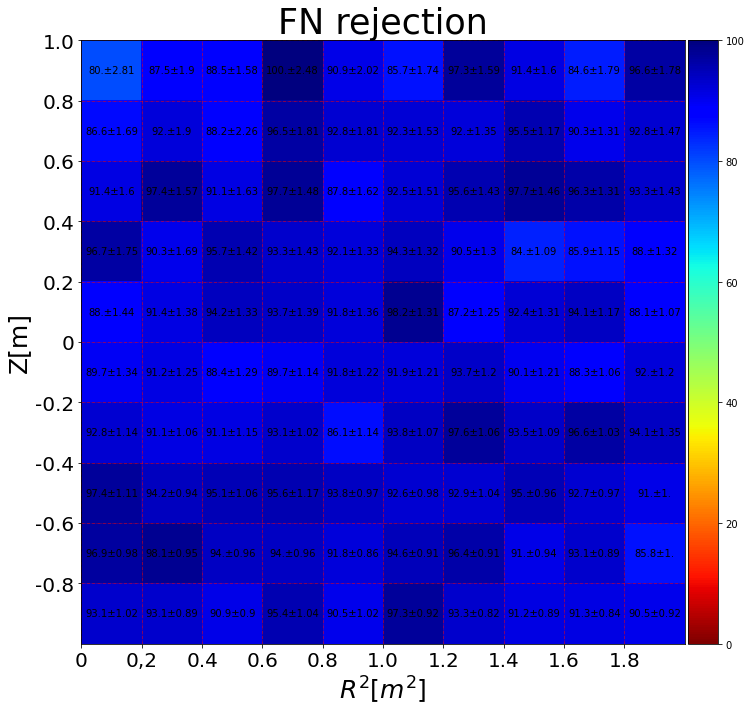

In [11]:


R2 = np.power(np.array(FN_vertexX),2)+np.power(np.array(FN_vertexY),2)
FN_eff = []
xx = []
yy = []
error = []

for j in range(-10,10,2):
    for i in range(0,20,2):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.2) & \
                    (j/10<= np.array(FN_vertexZ)) & \
                    (np.array(FN_vertexZ)<j/10+0.2)
        
        test = np.array(FN_pred)[isFiducial]
#         print(isFiducial)
#         print(test.sum())
#         print(test[test>0.5].sum()/test.sum())
        if len(test) == 0:
            FN_eff.append(0)
            error.append(0)
            xx.append(i)
            yy.append(j)
        else:
            FN_eff.append((len(test[test<0.5])/len(test)))
            error.append(nerror((len(test[test<0.5])/len(test)),len(test)))

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.trunc(np.array(FN_eff).reshape(-1,10)*1000)/10, cmap='jet_r',vmin=0,vmax=100)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')
# Show all ticks and label them with the respective list entries
# ax.set_xticklabels([0,0.1,0.5, 0.9, 1.1,1.5,1.9])
# ax.set_yticklabels(['',1.5,1.0,0.5,0,-0.5,-1.0,-1.5])


ax.set_xticks(np.arange(-.5, 9, 1))
ax.set_yticks(np.arange(-.5, 9, 1))
ax.set_xticklabels(['0','0,2','0.4','0.6','0.8','1.0','1.2','1.4','1.6','1.8'],fontsize=20)
ax.set_yticklabels(['1.0','0.8','0.6','0.4','0.2','0','-0.2','-0.4','-0.6','-0.8'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(10):
    for j in range(10):
        text = ax.text(j, i, np.array2string((np.trunc(np.array(FN_eff).reshape(-1,10)*1000)/10)[i, j]) + '\u00B1' +np.array2string((np.trunc(np.array(error).reshape(-1,10)*100)/100)[i, j])
,
                       ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("FN rejection",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



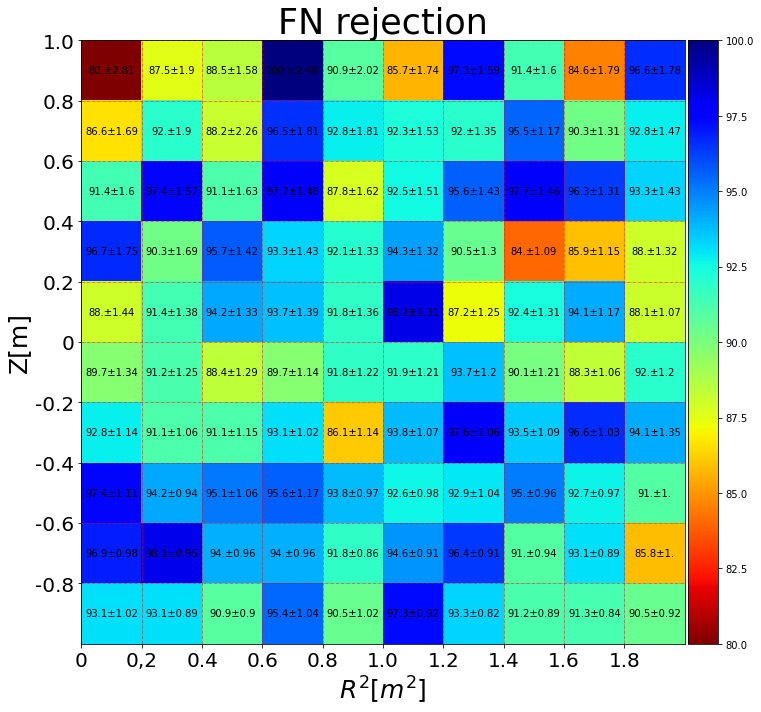

In [12]:


R2 = np.power(np.array(FN_vertexX),2)+np.power(np.array(FN_vertexY),2)
FN_eff = []
xx = []
yy = []
error = []

for j in range(-10,10,2):
    for i in range(0,20,2):


        isFiducial = (i/10<= R2) & \
                    (R2 < i/10+0.2) & \
                    (j/10<= np.array(FN_vertexZ)) & \
                    (np.array(FN_vertexZ)<j/10+0.2)
        
        test = np.array(FN_pred)[isFiducial]
#         print(isFiducial)
#         print(test.sum())
#         print(test[test>0.5].sum()/test.sum())
        if len(test) == 0:
            FN_eff.append(0)
            error.append(0)
            xx.append(i)
            yy.append(j)
        else:
            FN_eff.append((len(test[test<0.5])/len(test)))
            error.append(nerror((len(test[test<0.5])/len(test)),len(test)))

            xx.append(i)
            yy.append(j)

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()

im = ax.imshow(np.trunc(np.array(FN_eff).reshape(-1,10)*1000)/10, cmap='jet_r',vmin=80,vmax=100)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax = cax, orientation='vertical')
# Show all ticks and label them with the respective list entries
# ax.set_xticklabels([0,0.1,0.5, 0.9, 1.1,1.5,1.9])
# ax.set_yticklabels(['',1.5,1.0,0.5,0,-0.5,-1.0,-1.5])


ax.set_xticks(np.arange(-.5, 9, 1))
ax.set_yticks(np.arange(-.5, 9, 1))
ax.set_xticklabels(['0','0,2','0.4','0.6','0.8','1.0','1.2','1.4','1.6','1.8'],fontsize=20)
ax.set_yticklabels(['1.0','0.8','0.6','0.4','0.2','0','-0.2','-0.4','-0.6','-0.8'],fontsize=20)
ax.grid(color='red', linestyle='-.', linewidth=0.5)


for i in range(10):
    for j in range(10):
        text = ax.text(j, i, np.array2string((np.trunc(np.array(FN_eff).reshape(-1,10)*1000)/10)[i, j]) + '\u00B1' +np.array2string((np.trunc(np.array(error).reshape(-1,10)*100)/100)[i, j])
,
                       ha="center", va="center", color="k")
ax.set_xlabel(r'$R^2[m^2]$',fontsize=25)
ax.set_ylabel('Z[m]',fontsize=25)
ax.set_title("FN rejection",fontsize = 35)
fig.tight_layout()
# ax.set_xlim([-0.5,11])
# ax.set_ylim([-0.5, 15])
plt.show()



In [13]:
print('end')

end
